# DS 101 Project 2 - Mapping Emotions in Python, The American Civil War 

#### Group Members
Joseph Fenuku,
Mason Spillman,
Colin Lambert,
Quinn Sheppard,
Claudia Castrillo 


### 1. Introduction

In this project for Digital Studies 101: Foundations in Digital Studies, our group used CSV file data compiled from Project Guttenburg to create an accurate Geoparser map of Virginia showcasing the most prominent emotions felt during the American Civil War. This process consists of us creating a custom corpus dataframe using Gutenberg, and then scraping the data frame for further information. Once a usable data frame was created we then cleaned the data, split it into sentences, cleaned the individual sentences, dropped any unnecessary data, and removed any sentences that lacked toponyms or other relevant information. Once all that was done our group loaded Geoparser and streamlined the emotional score to make the mapped data simpler to understand. Creating a finished Geoparser map showcasing the emotions of the American Civil War. 


### 2. Hypothesis

We believe that the Geoparser map will primarily showcase negative emotions surrounding the war in Virginia. Negative keywords like loss, defeat, and surrender will be most prominent. Virginia will also not be the only place on the local map where emotions will be shown, places like West VA, California, and Pennsylvania will all show up through various associations found in the text. What will be interesting to see is what emotions are present in other countries that were also tied into the American Civil War. Countries like England, France, and Spain all had some form of input during the conflict. Texts that cite their emotions will be few, which may skew the accuracy of emotions in those countries. 


### 3. Corpus Description

Since we were looking to filter different emotions during the Civil War, we had a vast amount of data to comb through. To start, we had 720 different texts when we had only filtered on literature that contained the word “civil war” in the subject. This was to get the base for our data but that was far too much so we had to further filter down. We also added a filter to only include text that contained “United States”. We didn't want text from other countries so this was essential for us to get accurate data but we still ended up with 630 results which was still too much. We ended our code by further filtering our file by adding the condition to include texts that only revolve around the campaign. We ended up with 70 different texts after running our code all the conditions were met. 


In [1]:
#df_civil = pg_catalog_clean[pg_catalog_clean.subjects.str.contains('Civil War') & pg_catalog_clean.subjects.str.contains('United States') & pg_catalog_clean.subjects.str.contains('Campaigns')]


In [2]:
#Import the results and show a sample
import pandas as pd
df_civil_TEXTS = pd.read_pickle('df_civil_TEXTS.pickle')
df_civil_TEXTS.sample(5)

,text_id,type,issued,title,language,subjects,locc,bookshelves,second_author,last_name,first_name,birth,death,text_data
12162,12233,Text,2004-05-01,Stonewall Jackson and the American Civil War,en,"United States -- History -- Civil War, 1861-18...",E456,US Civil War; Browsing: Biographies; Browsing:...,"Wolseley, Garnet Wolseley, Viscount, 1833-1913...",Henderson,G. F. R. (George Francis Robert),1854,1903,Produced by Derek Thompson and Sue Asscher\r\n...
1048,1067,Text,2004-06-01,Personal Memoirs of U. S. Grant — Volume 1,en,"Generals -- United States -- Biography; Grant,...",E660,US Civil War; Browsing: Biographies; Browsing:...,<NA>,Grant,Ulysses S. (Ulysses Simpson),1822,1885,PERSONAL MEMOIRS OF U. S. GRANT — VOLUME 1 ***...
5809,5851,Text,2004-06-01,"Memoirs of General W. T. Sherman, Volume I., P...",en,Generals -- United States -- Biography; United...,E456,US Civil War; Browsing: Biographies; Browsing:...,<NA>,Sherman,William T. (William Tecumseh),1820,1891,"MEMOIRS OF GENERAL W. T. SHERMAN, VOLUME I., P..."
23676,23747,Text,2007-12-05,Destruction and Reconstruction: Personal Exper...,en,"United States -- History -- Civil War, 1861-18...",E456,US Civil War; Browsing: History - American; Br...,<NA>,Taylor,Richard,1826,1879,DESTRUCTION AND RECONSTRUCTION ***\r\n\r\n\r\n...
24694,24765,Text,2008-03-06,A Treatise on the Tactical Use of the Three Ar...,en,"United States -- History -- Civil War, 1861-18...",U,United States; Browsing: History - American; B...,<NA>,Lippitt,Francis J. (Francis James),1812,1902,A TREATISE ON THE TACTICAL USE OF THE THREE AR...


### 4. Geoparsing Results

The geoparsing process was relatively straightforward compared to the other steps. The pickle file containing the list of locations was given to the tool, in which each location was parsed from the sentences and surrounding context. This list was sourced from the 70 different texts previously referred to, all matching the previous filters applied to ensure the data aligned with the American Civil War as well as the correct time frame. We were also wary of false positives that may have been collected from the tool, and tried our best to filter out potential inconsistencies such as names being confused with locations.

Some false positives can be seen in the geoparser such as Washington state being confused with Washington D.C.. This is due to the tool not being able to consider the context or time period in the surrounding sentence, and strictly matching the literal name given with the location. To help remove false positives like these in future, we could apply filters that check the surrounding context given, although this may be very time consuming. A shorter yet imperfect  way to do this would be to filter the more common mistakes such as Washington not yet being a state and for similar locations. This method can also be refined by referencing the locations given based on a specific location list given to the tool.


In [3]:
#Import the results and show a sample
df_civil_PLACES = pd.read_pickle('df_civil_PLACES.pickle')
df_civil_PLACES.sample(5)

,cleaned_sentences,text_id,title,subjects,last_name,first_name,birth,death,sentences,toponyms,nltk_toponym_count,place,latitude,longitude,feature_name
20733,"On reaching the front, however, about eight A...",1067,Personal Memoirs of U. S. Grant — Volume 1,"Generals -- United States -- Biography; Grant,...",Grant,Ulysses S. (Ulysses Simpson),1822,1885,"On reaching the front, however, about\r\neight...","[Pittsburg, Pittsburg, Pittsburg, Pittsburg]",270,"[Pittsburgh, None]","[40.44062, None]","[-79.99589, None]",[seat of a second-order administrative divisio...
10905,"Hawes fled from the capital, half inaugurated,...",22100,Slavery and four years of war,"United States -- History -- Civil War, 1861-18...",Keifer,Joseph Warren,1836,1932,"Hawes fled from the capital, half inaugurated,...",[Kentucky],1014,[Kentucky],[38.20042],[-84.87762],[first-order administrative division]
13560,I had telegraphed to Lancaster for Mrs. Sherma...,2617,Memoirs of General William T. Sherman — Volume 2,Generals -- United States -- Biography; United...,Sherman,William T. (William Tecumseh),1820,1891,I had telegraphed to Lancaster for Mrs. Sherma...,"[Lancaster, Lancaster, Lancaster, Lancaster]",195,[Lancaster],[40.03788],[-76.30551],[seat of a second-order administrative division]
13589,I have alluded to Gen. Longstreet taking my t...,45603,Two Wars: An Autobiography of General Samuel G...,"United States -- History -- Civil War, 1861-18...",French,Samuel Gibbs,1818,1910,I have alluded to Gen. Longstreet taking my\r\...,[Suffolk],73,[Suffolk County],[40.94046],[-72.68524],[second-order administrative division]
8749,"Frederick, Md., 175, 250, 268.",47746,Campfire and Battlefield An Illustrated Histor...,"United States -- History -- Civil War, 1861-18...",Johnson,Rossiter,1840,1931,"Frederick, Md., 175, 250, 268.","[Frederick, Md.]",35,"[Frederick, Maryland]","[39.41427, 39.00039]","[-77.41054, -76.74997]",[seat of a second-order administrative divisio...


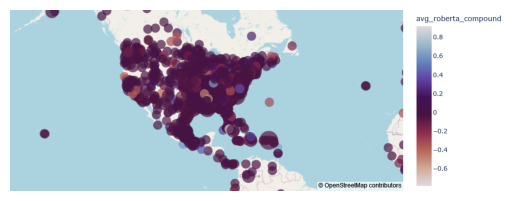

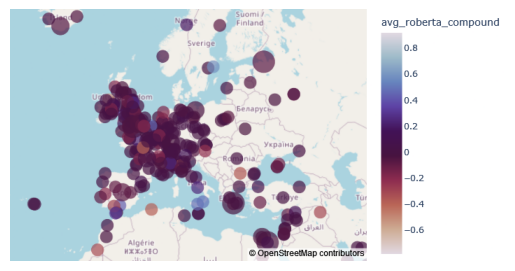

In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


america = mpimg.imread('newplot-america.png')
europe = mpimg.imread('newplot-europe.png')

plt.imshow(america)
plt.axis('off') 
plt.show()

plt.imshow(europe)
plt.axis('off') 
plt.show()

### 5. Sentiment Analysis Results


Looking at the average scores of the positive, neutral, and negative word associations we see that neutral is the largest, which makes sense because since these are campaigns it probably focus on the raw facts of the information rather than opinions about it. We also see that the negative word association is larger when looking at the overall averages and is shown to be negative when combining all three lists. This makes sense because it was a war and wars tend to be sad, unenjoyable affairs, and the South would likely be writing negatively since they lost. While the negative was bigger the positive wasn't too much smaller and this could be because the North would write positively since they won the war, but still average to more negative since the North would still write negatively about the lives lost.

In [6]:
#Import the results and show a sample
df_civil_SENTIMENTS = pd.read_pickle('df_civil_SENTIMENTS.pickle')
df_civil_SENTIMENTS.sample(5)

,place,location_count,latitude,longitude,location,avg_roberta_pos,avg_roberta_neu,avg_roberta_neg,avg_roberta_compound,location_count_bucket
1840,Palmetto,6,33.51789,-84.66965,populated place,0.081849,0.820064,0.098087,-0.026809,1
712,Eagledale,3,47.61426,-122.51541,populated place,0.028877,0.464529,0.506594,-0.360008,1
2532,Tombs Run,1,41.25257,-77.32553,populated place,0.005769,0.110453,0.883778,-0.781030,1
2665,Walden,1,32.7082,-83.66546,populated place,0.068325,0.907553,0.024122,0.004086,1
300,Buck Hill,1,39.04537,-80.47065,section of populated place,0.514058,0.476605,0.009337,0.264169,1


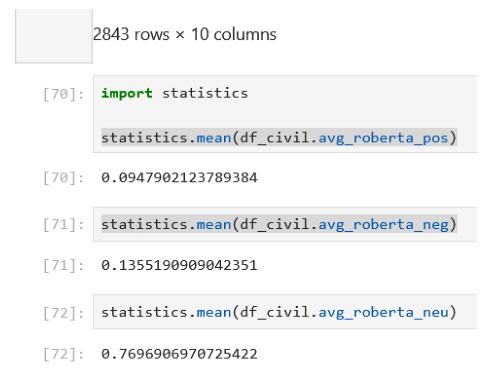

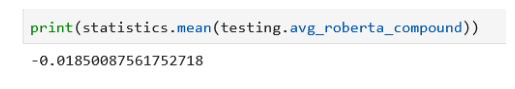

In [8]:
emotions = mpimg.imread('emotions.png')
avg = mpimg.imread('avg.png')

plt.imshow(emotions)
plt.axis('off') 
plt.show()

plt.imshow(avg)
plt.axis('off') 
plt.show()

### 6. Mapping

For the mapping process, the locations with extremely high quantities were removed to make the data more balanced and easier to interpret. Some places had over 1,000 counts, which could make the overall emotional trends harder to see, so filtering them out was necessary. Any locations that didn’t have enough useful data were also excluded in order to focus on the most important areas. The map was then centered and zoomed in to highlight key regions like the U.S. and parts of Europe where the most emotional data was found.

The data on the map showed more clearly where people felt strongly (emotionally) about the war, with red areas showing negative emotions tied to loss and defeat, especially in heavily affected states like Virginia. It also includes places like England and France, which were connected to the war in smaller ways but still had some type of impact. The color scheme on the map correlates with different emotions throughout the time of the war. The darker (purple) colors represent neutral feelings, the reddish colors represent negative emotions (like loss or defeat), and blue conveys positive emotions (like victory). This helped display the emotional reactions to the Civil War effectively on the map, both in the U.S. and internationally. So even though the U.S. had the most data, European countries like England and France still appeared due to their diplomatic ties to the war.


In [7]:
import plotly.express as px
#import matplotlib.pyplot as plt

# Define a threshold for the minimum count
#threshold = 200

# Filter the dataframe to include only rows where location_count is above the threshold
#df_filtered = df_civil[df_civil['location_count'] >= threshold]

# Plot the histogram of the filtered location counts
#df_filtered['location_count'].plot.hist(bins=10, alpha=0.7)

# Add labels and title for clarity
#plt.xlabel('Location Count')
#plt.ylabel('Frequency')
#plt.title('Histogram of Location Counts (Filtered)')
#plt.show()

### 7. Reflection (Individual)

When we first started this project I expected it to be fairly straightforward and to simply connect different timelines from the civil war and see what the specific emotions/attitudes were in different locations, but it turned out to be more challenging than anticipated. I thought that once the data was cleaned, the emotions would clearly reflect on the map where it was most strong (either negative or positive). However, surprisingly the neutral emotions dominated, which I guess made sense given that many of the documents focused on historical records of the war rather than personal feelings.

I feel as though the process was mostly successful, except one challenge we kind of faced was ensuring that the labeling of the emotions accurately represented the text without being influenced by irrelevant data. There were also instances where locations were wrongly mapped due to uncertain place names or errors in the dataset, which casued some "garbage" data still being there when we didn’t need it. 

If I had more time, I would focus on clarifying the results by improving the accuracy of the location and maybe create a separation between different types of emotions (e.g., sadness, anger, hope). This would provide a more detailed emotional map of the Civil War.
